In [1]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd
from skfuzzy import control as ctrl


In [2]:
dataFrame = pd.read_csv('CHD.csv')
dataFrame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [30]:
dataFrame

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [31]:
# dataFrame= dataFrame.drop(['BPMeds', 'currentSmoker', 'diaBP', 'diabetes', 'sysBP', 'prevalentStroke', 'prevalentHyp', 'glucose' ], axis=1)
# dataFrame

In [32]:
# # import matplotlib.pyplot as plt

# plt.scatter(dataFrame['BMI'], dataFrame['TenYearCHD'])
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.title('Simple Scatter plot')
# plt.xlabel('X - value')
# plt.ylabel('Y - value')
# plt.show()

In [33]:
# # import seaborn as sns

# sns.catplot(x='BPMeds',hue='TenYearCHD',data=dataFrame,kind="count")

In [34]:
# df = dataFrame[['BMI', 'male', 'cigsPerDay','totChol', 'TenYearCHD']]
# df= df[df['cigsPerDay']>=1]
# print(df)
# df = df[df['TenYearCHD']==1]
# print(df)

In [35]:
dataFrame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Membership Functions

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


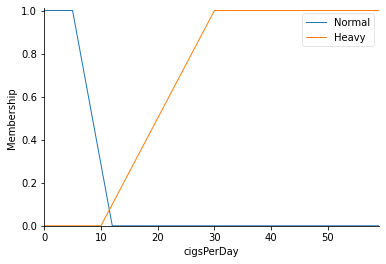

In [171]:
cigsPerDay	 = ctrl.Antecedent(np.arange(0, 60), 'cigsPerDay')
cigsPerDay['Normal'] = fuzz.trapmf(cigsPerDay.universe, [-1, 0, 5, 12])
cigsPerDay['Heavy'] = fuzz.trapmf(cigsPerDay.universe, [10,30 ,59, 60])
cigsPerDay.view()

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


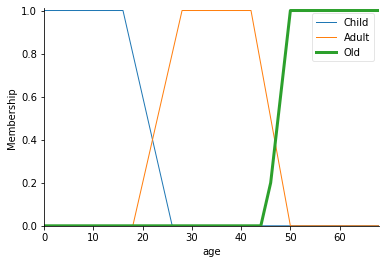

In [157]:
age = ctrl.Antecedent(np.arange(0, 70, 2), 'age')
age['Child'] = fuzz.trapmf(age.universe, [-1, 0, 16, 26])
age['Adult'] = fuzz.trapmf(age.universe, [18, 28, 42, 50])
age['Old'] = fuzz.trapmf(age.universe, [45, 50, 79, 80])
age['Old'].view()

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


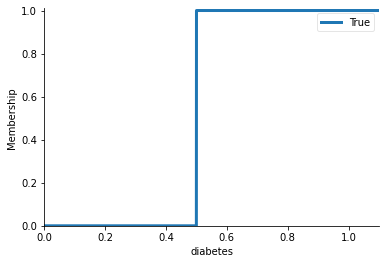

In [117]:

diabetes = ctrl.Antecedent(np.arange(0, 1.1, 0.0001), 'diabetes')
diabetes['True'] = fuzz.trapmf(diabetes.universe, [0.5, 0.5, 1.1, 1.1])
diabetes['True'].view()


d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


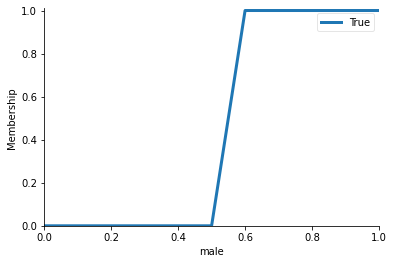

In [155]:
male = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'male')
male['True'] = fuzz.trapmf(male.universe, [0.5, 0.6, 1, 1.5])
male['True'].view()

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


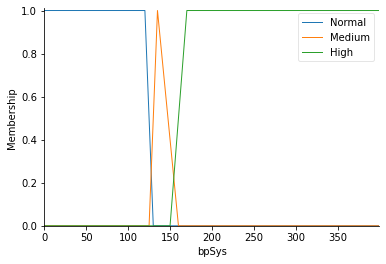

In [160]:
bpSys = ctrl.Antecedent(np.arange(0, 400), 'bpSys')
bpSys['Normal'] = fuzz.trapmf(bpSys.universe, [-1, 0, 120, 130])
bpSys['Medium'] = fuzz.trimf(bpSys.universe, [125, 135, 160])
bpSys['High'] = fuzz.trapmf(bpSys.universe, [150, 170, 399, 400])

bpSys.view()

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


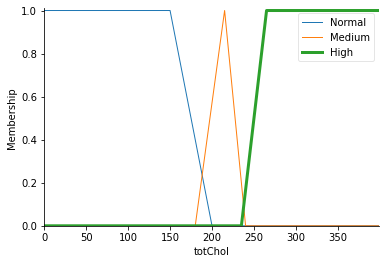

In [121]:
# age.automf(3)
totChol = ctrl.Antecedent(np.arange(0, 400), 'totChol')
totChol['Normal'] = fuzz.trapmf(totChol.universe, [-1, 0, 150, 200])
totChol['Medium'] = fuzz.trimf(totChol.universe, [180, 215, 240])
totChol['High'] = fuzz.trapmf(totChol.universe, [235, 265, 499, 500])
totChol['High'].view()
# totChol 
# normal <200
# 200< medium <240
# high > 240


d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


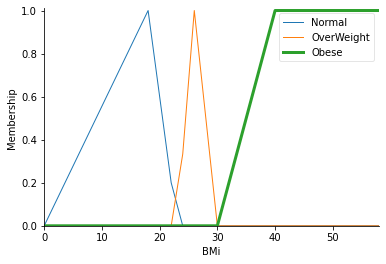

In [161]:
# age.automf(3)
BMi = ctrl.Antecedent(np.arange(0, 60,2), 'BMi')
BMi['Normal'] = fuzz.trimf(BMi.universe, [0, 18 , 23])
BMi['OverWeight'] = fuzz.trimf(BMi.universe, [23, 26, 30])
BMi['Obese'] = fuzz.trapmf(BMi.universe, [30, 40, 59, 60])
BMi['Obese'].view()
# BMI
# normal <25
# overweiht 25-31
# obess > 31 

d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


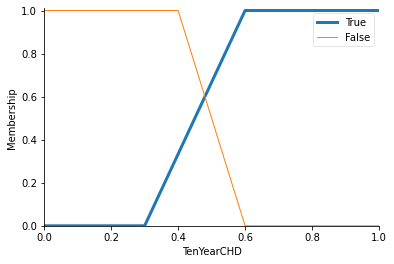

In [162]:
TenYearCHD = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'TenYearCHD')
TenYearCHD['True'] = fuzz.trapmf(TenYearCHD.universe, [0.3, 0.6, 1, 1.5])
TenYearCHD['False'] = fuzz.trapmf(TenYearCHD.universe, [-1, 0, 0.4, 0.6])

TenYearCHD['True'].view()

In [48]:
# rule1 = ctrl.Rule( BMi['obess'] | totChol['High'], TenYearCHD['True'])
# rule2 = ctrl.Rule(BMi['overWeight'] & cigsPerDay['heavily'], TenYearCHD['True'])
# rule3 = ctrl.Rule(totChol['Normal'], TenYearCHD['False'])
# rule4 = ctrl.Rule(male['True'] & BMi['overWeight'], TenYearCHD['False'])
# rule5 = ctrl.Rule(male['True'] & cigsPerDay['normal'], TenYearCHD['False'])

Rules for CHD --> False

In [175]:
rule1 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Normal'] & age['Child'] & ~diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])

rule2 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Normal'] & age['Adult'] & diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])
rule3 = ctrl.Rule((male['True'] | ~male['True']) & BMi['OverWeight'] & age['Adult'] & ~diabetes['True'] & totChol['Medium'] & bpSys['Medium'] & cigsPerDay['Normal'], TenYearCHD['False'])

rule4 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Normal'] & age['Old'] & diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])
rule5 = ctrl.Rule((male['True'] | ~male['True']) & BMi['OverWeight'] & age['Old'] & ~diabetes['True'] & totChol['Medium'] & bpSys['Medium'] & cigsPerDay['Normal'], TenYearCHD['False'])
rule6 = ctrl.Rule(~male['True'] & BMi['Normal'] & age['Old'] & diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Normal'], TenYearCHD['False'])

rule7 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Old'] & ~diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])
rule8 = ctrl.Rule((male['True'] | ~male['True']) & BMi['OverWeight'] & age['Old'] & ~diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])

rule9 = ctrl.Rule(~male['True'] & BMi['Obese'] & age['Old'] & diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])
rule10 = ctrl.Rule(~male['True'] & BMi['OverWeight'] & age['Old'] & diabetes['True'] & totChol['Normal'] & bpSys['Normal'] & cigsPerDay['Normal'], TenYearCHD['False'])

Rules for CHD --> True

In [172]:
rule11 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Adult'] & ~diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule12 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Adult'] & diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule13 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Old'] & ~diabetes['True'] & totChol['Medium'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule14 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Old'] & ~diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule15 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Old'] & diabetes['True'] & totChol['Medium'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule16 = ctrl.Rule((male['True'] | ~male['True']) & BMi['Obese'] & age['Old'] & diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule17 = ctrl.Rule((male['True'] | ~male['True']) & BMi['OverWeight'] & age['Old'] & diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule18 = ctrl.Rule((male['True'] | ~male['True']) & BMi['OverWeight'] & age['Old'] & ~diabetes['True'] & totChol['High'] & bpSys['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

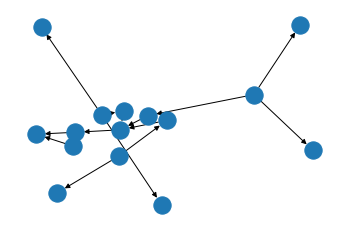

In [83]:
rule2.view()

In [105]:
CHD_Rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
CHD = ctrl.ControlSystemSimulation(CHD_Rules)


In [ ]:
dataFrame=dataFrame.drop(['education','BPMeds',	'prevalentStroke','sysBP','diaBP','heartRate','glucose'	], axis=1)

In [52]:
dataFrame = np.array(dataFrame)

In [53]:
dataFrame[9]

array([  1.  ,  43.  ,   1.  ,  30.  ,   1.  ,   0.  , 225.  ,  23.61,
         0.  ])

male	age	cigsPerDay	totChol	BMI	heartRate	TenYearCHD

In [ ]:
# out = np.empty(8)
# for i in range( 8):
#     current = dataFrame[i]
#     CHD.input['BMi'] = current[7] 
#     CHD.input['cigsPerDay'] = current[3] 
#     CHD.input['currentSmoker'] = current[2] 
#     CHD.input['prevalentHyp'] =  current[4]
#     CHD.input['diabetes'] =  current[5]
#     CHD.input['totChol'] =  current[6]
#     CHD.input['male'] = current[0]
#     CHD.input['age'] = current[1] 
#     CHD.compute()
#     out= np.append(out, CHD.output['TenYearCHD'])



In [66]:
out= out[out>=0.5]


In [67]:
out

array([25.25      , 25.25      ,  0.686     ,  0.67435897,  0.71818182,
        0.71818182,  0.65224515,  0.67276986,  0.71818182])

In [108]:
CHD.input['BMi'] = 25.34
CHD.input['cigsPerDay'] = 20
CHD.input['totChol'] = 245
CHD.input['male'] = 1
CHD.input['diabetes'] = 0
CHD.input['bpSys'] = 120
CHD.input['age'] = 67

1	48	20.0	245.0	25.34	75.0	0

male	age	cigsPerDay	totChol	BMI	heartRate	TenYearCHD
0	1	39	0.0	195.0	26.97	80.0	0

0.6743589743589743


d:\Users\miret\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


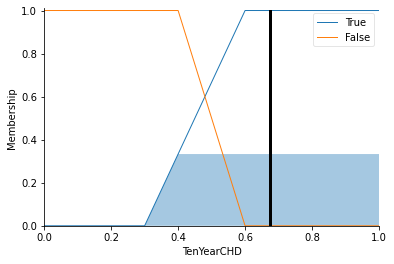

In [109]:
CHD.compute()
print(CHD.output['TenYearCHD'])
TenYearCHD.view(sim=CHD)